In [1]:
import numpy as np
import os
%matplotlib inline 
data = np.loadtxt(open("./data/ex2data1.txt", "r"), delimiter=",")
print('data loaded')

data loaded


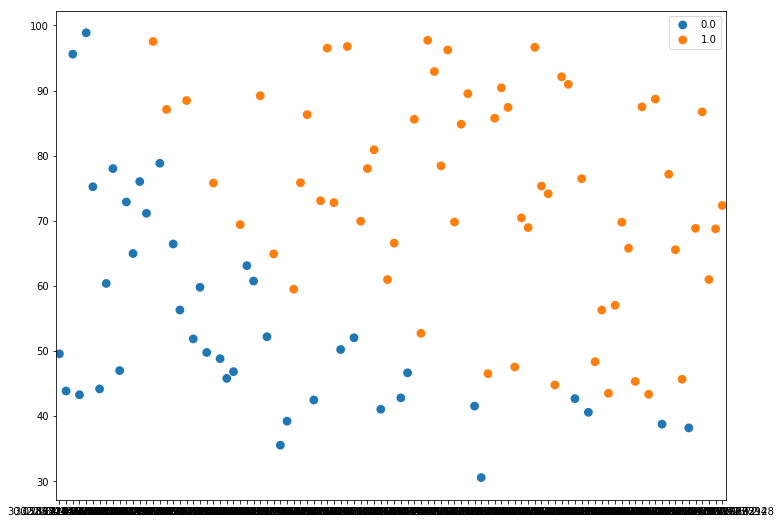

In [2]:
X = data[:, 0:2]
y = data[:, 2]
#b. plot distribution of 0 and 1 en fonction de x1 et x2
import seaborn as sb
import matplotlib.pyplot as plt 
plt.subplots(figsize=(12,9))
sb.pointplot(x = X[:,0], y = X[:,1], hue = y, style = y, join = False)

In [3]:
#c. analyse des variables explicatives 
import pandas as pd 
Xdf = pd.DataFrame(X)
Xdf.describe() # les valeurs prises par les données sont comparables, on peut 
# donc se dispenser de normalisation


,0,1
count,100.000000,100.000000
mean,65.644274,66.221998
std,19.458222,18.582783
min,30.058822,30.603263
25%,50.919511,48.179205
50%,67.032988,67.682381
75%,80.212529,79.360605
max,99.827858,98.869436


In [4]:
#d. separation train test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain,  ytest = train_test_split(X,y, test_size = 0.3, random_state = 0, stratify = y)

In [5]:
#f. regression logisitque
import sklearn.linear_model as lm
reglog = lm.LogisticRegression()
reglog_fit = reglog.fit(xtrain,ytrain)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


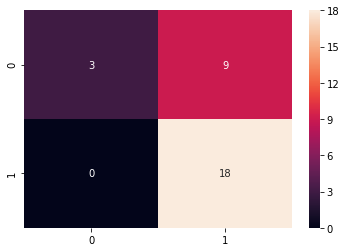

In [9]:
#matrice de confusion 
import sklearn.metrics as sm
sm.confusion_matrix(ytrain, train_pred, [0,1])
cm = sm.confusion_matrix(ytest, test_pred, [0,1])
# les résultats sont très mauvais c'est normal au regard de la forme des données
import seaborn as sns 
sns.heatmap(cm, annot=True)

<Figure size 432x288 with 0 Axes>

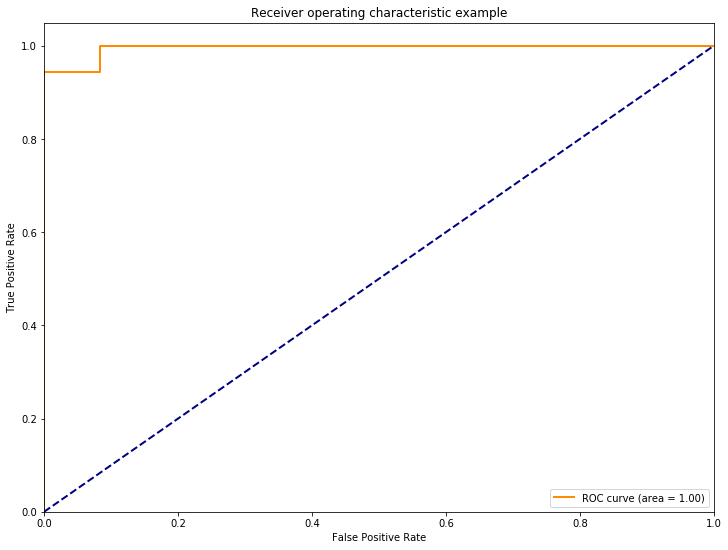

In [10]:
'''Receiving Operator Characteristic (ROC) curve'''
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

y_score = reglog_fit.decision_function(xtest)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(ytest, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.subplots(figsize=(12,9))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


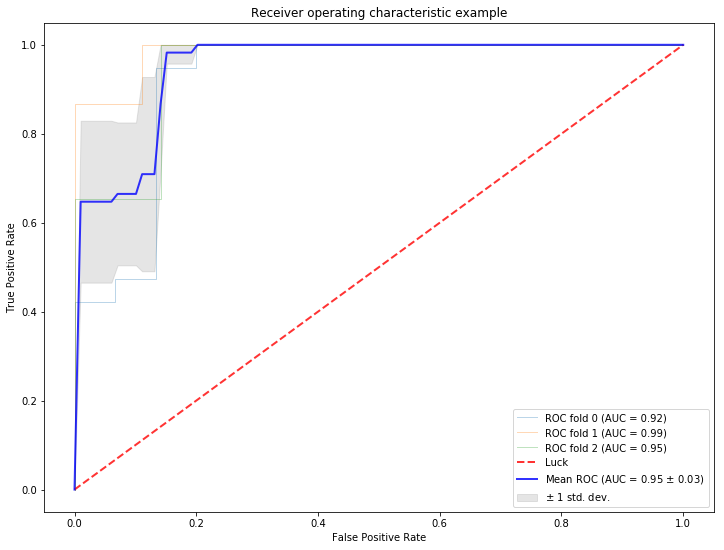

In [11]:
'''ROC curve cross validation'''
# si l'on souhaite visualiser dans une courbe ROC les résultats de 
# la cross validation on peut utiliser le code suivant 
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.model_selection import KFold 

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

cv = KFold(n_splits=3, random_state = 42) # définition des séparations à effectuer
classifier = lm.LogisticRegression() # définition du modèle à utiliser

tprs = [] # une liste pour stocker les true positive rates
aucs = [] # une liste pour les area under the curve
mean_fpr = np.linspace(0, 1, 100) # un array qui représente la première bissectrice
plt.subplots(figsize=(12,9))

i = 0 # initialisation de l'indice de répétition de l'algorithme
for train, test in cv.split(X, y, groups = y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()